# Task - 2 (Heart Failure Prediction)

Dataset Link: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data


or by clicking below link
https://raw.githubusercontent.com/sameerCoder/ML_Datasets/main/heart_failure_clinical_records_dataset.csv

Perform data analysis and use different machine learning algorithms to create a model for predicting mortality 
caused by Heart Failure.

Compare at least 3 different algorithms and show their accuracies with the help of a graph.

In [1]:
import warnings
warnings.simplefilter('ignore')

# Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
%matplotlib inline

# Loading the dataset

In [4]:
filepath ="https://raw.githubusercontent.com/sameerCoder/ML_Datasets/main/heart_failure_clinical_records_dataset.csv"
data = pd.read_csv(filepath)

# Performing EDA

In [5]:
data.sample(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
157,50.0,0,250,0,25,0,262000.00,1.00,136,1,1,120,0
78,75.0,1,203,1,38,1,283000.00,0.60,131,1,1,74,0
88,44.0,0,84,1,40,1,235000.00,0.70,139,1,0,79,0
272,67.0,0,213,0,38,0,215000.00,1.20,133,0,0,245,0
41,50.0,0,124,1,30,1,153000.00,1.20,136,0,1,32,1
116,60.0,1,96,1,60,1,271000.00,0.70,136,0,0,94,0
144,72.0,1,943,0,25,1,338000.00,1.70,139,1,1,111,1
14,49.0,1,80,0,30,1,427000.00,1.00,138,0,0,12,0
72,85.0,0,5882,0,35,0,243000.00,1.00,132,1,1,72,1
64,45.0,0,582,0,80,0,263358.03,1.18,137,0,0,63,0


In [6]:
data.shape

(299, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Checking the outcome labels

In [9]:
data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

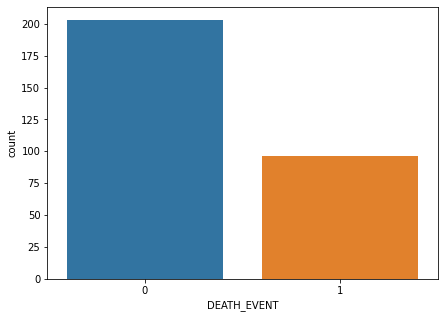

In [10]:
plt.figure(figsize=(7, 5))
sns.countplot(data=data, x='DEATH_EVENT')
plt.show()

# Checking for null values

In [11]:
data.isnull().sum().any()

False

# Checking for duplicate rows

In [12]:
duplicated_rows = data[data.duplicated()]
duplicated_rows.shape

(0, 13)

# Checking the distribution of data 

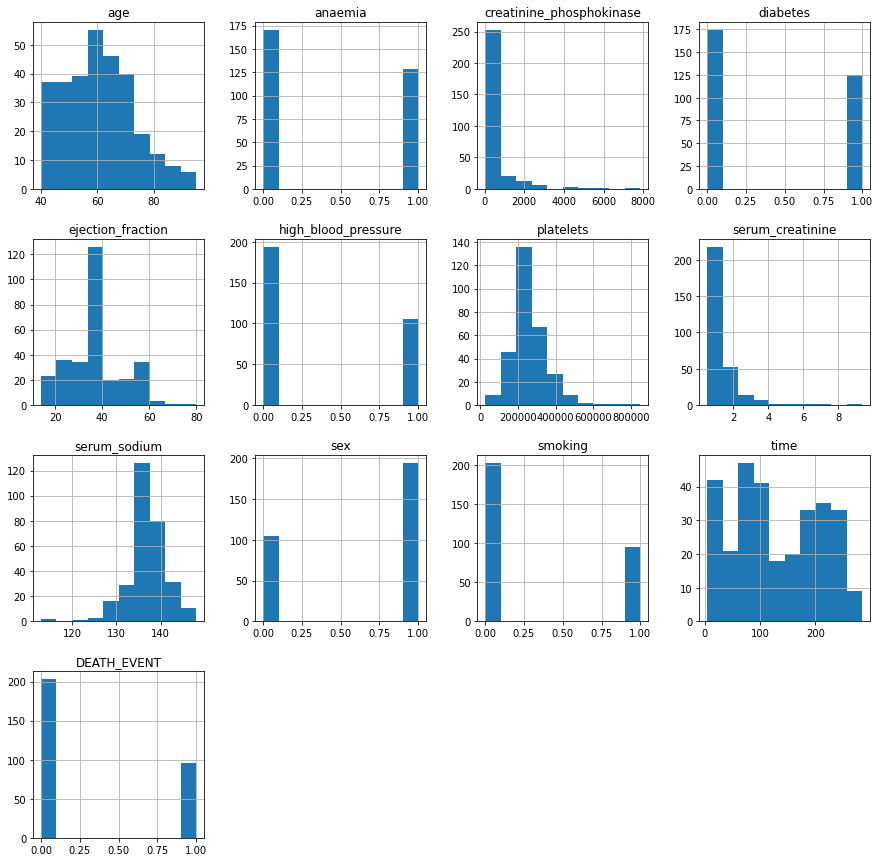

In [13]:
data.hist(figsize=(15, 15))
plt.show()

# Checking Correlation between Dependent and Independent variables

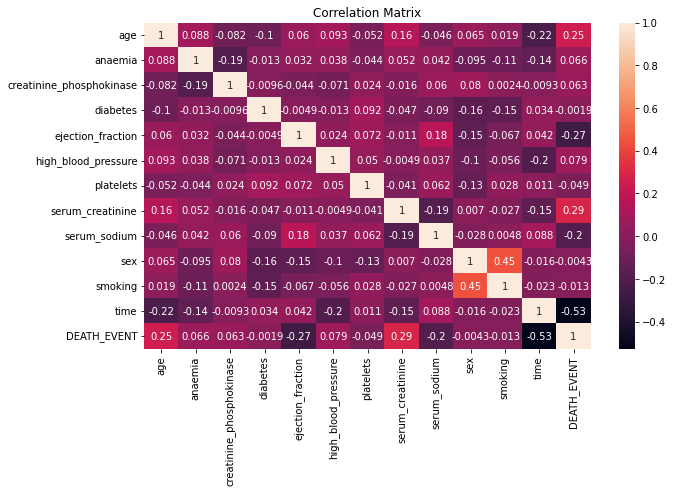

In [14]:
plt.figure(figsize = (10, 6))
cormat = sns.heatmap(data.corr(), annot=True)
cormat.set_title('Correlation Matrix')
plt.show()

# Outlier Detection and Removal

In [15]:
def diagnostic_plot(data, col):
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    sns.distplot(data[col], bins=10)
    plt.title('Histogram')
    
    plt.subplot(1, 3, 2)
    stats.probplot(data[col], dist='norm', fit=True, plot=plt)
    plt.title('Q-Q Plot')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(y=data[col])
    plt.title('Boxplot')
    
    plt.show()

Checking the 'age' column 

In [16]:
data['age'].value_counts()

60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
53.000    10
58.000    10
63.000     8
80.000     7
72.000     7
40.000     7
42.000     7
85.000     6
68.000     5
52.000     5
62.000     5
51.000     4
59.000     4
61.000     4
73.000     4
49.000     4
69.000     3
46.000     3
64.000     3
82.000     3
90.000     3
78.000     2
60.667     2
54.000     2
77.000     2
57.000     2
66.000     2
44.000     2
67.000     2
95.000     2
48.000     2
43.000     1
86.000     1
81.000     1
79.000     1
41.000     1
94.000     1
87.000     1
47.000     1
56.000     1
Name: age, dtype: int64

In [17]:
print("Maximum Age is: {}".format(data['age'].max()))
print("Minimum Age is: {}".format(data['age'].min()))

Maximum Age is: 95.0
Minimum Age is: 40.0


Checking the 'creatinine_phosphokinase' column

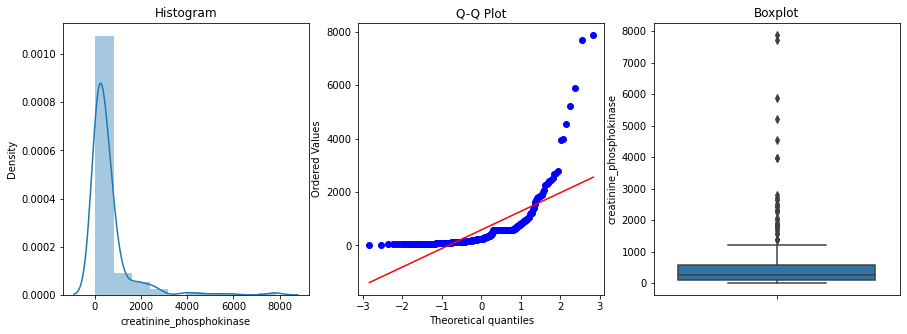

In [18]:
diagnostic_plot(data, 'creatinine_phosphokinase')

Checking the 'ejection_fraction' column

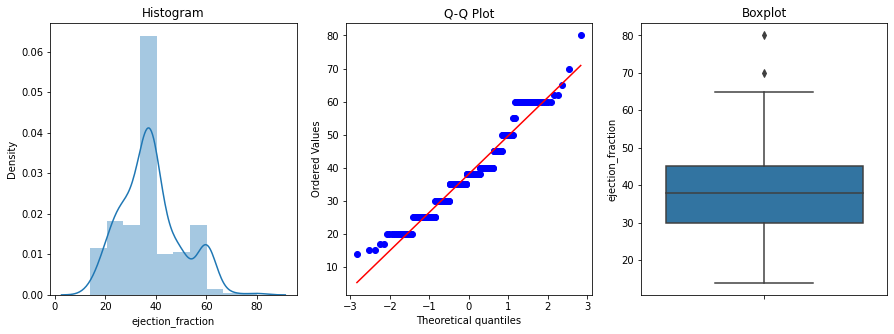

In [19]:
diagnostic_plot(data, 'ejection_fraction')

Checking the 'platelets' column 

In [20]:
data['platelets'].value_counts().sort_index(ascending=False)

850000.0    1
742000.0    1
621000.0    1
543000.0    1
533000.0    1
           ..
70000.0     1
62000.0     1
51000.0     1
47000.0     1
25100.0     1
Name: platelets, Length: 176, dtype: int64

Checking the 'serum_creatinine' column 

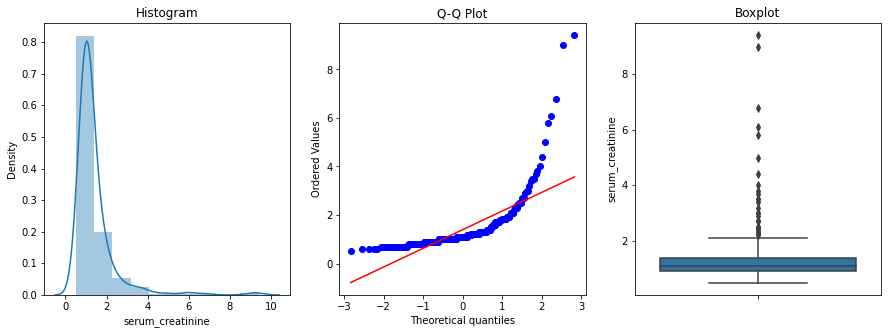

In [21]:
diagnostic_plot(data, 'serum_creatinine')

Checking the 'serum_sodium' column 

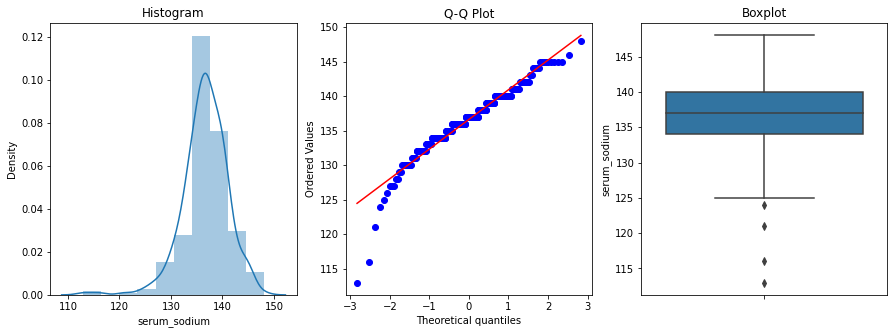

In [22]:
diagnostic_plot(data, 'serum_sodium')

Checking the 'time' column 

In [23]:
data['time'].value_counts().sort_index(ascending=False)

285    1
280    1
278    1
271    1
270    2
      ..
10     6
8      2
7      2
6      1
4      1
Name: time, Length: 148, dtype: int64

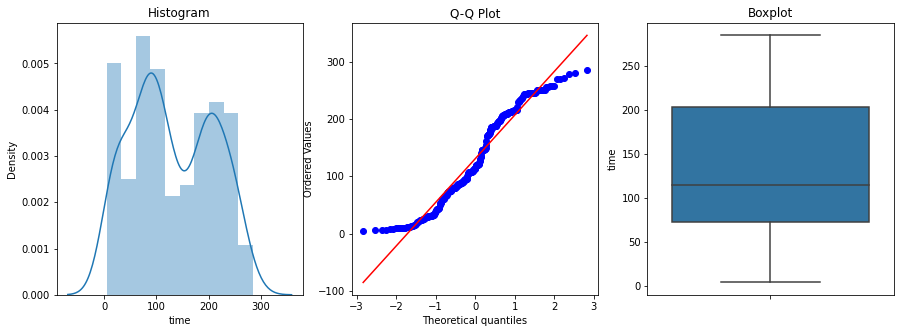

In [24]:
diagnostic_plot(data, 'time')

In [25]:
data.shape

(299, 13)

# Seperating Dependent and Independent variables

In [26]:
X = data.drop(['DEATH_EVENT'], axis=1)
y = data['DEATH_EVENT']

# Performing train-test split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Scaling the data

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Checking the Accuracy Scores for 3 different models

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline
pipeline_lr = Pipeline([('lr', LogisticRegression())])
pipeline_svc = Pipeline([('svc', SVC())])
pipeline_dt = Pipeline([('dt', DecisionTreeClassifier())])

pipelines = [pipeline_lr, pipeline_svc, pipeline_dt]
best_acc = 0
best_clf = 0
best_pipeline=""
pipe_dict = {0: 'Logistic Regression', 1: 'Support Vector Classifier', 2: 'Decision Tree Classifier'}

for pipe in pipelines:
    pipe.fit(X_train, y_train)
    
for i, model in enumerate(pipelines):
    print("{} - Test Accuracy: {}".format(pipe_dict[i], model.score(X_test, y_test)))
    
for i, model in enumerate(pipelines):
    if model.score(X_test, y_test)>best_acc:
        best_acc = model.score(X_test, y_test)
        best_pipeline = model
        best_clf = i
print("Classifier with best accuracy is {}". format(pipe_dict[best_clf]))

Logistic Regression - Test Accuracy: 0.7833333333333333
Support Vector Classifier - Test Accuracy: 0.8
Decision Tree Classifier - Test Accuracy: 0.7833333333333333
Classifier with best accuracy is Support Vector Classifier


# Importing Performance Metrics for Classification

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [32]:
print("Train accuracy :{}".format(accuracy_score(y_train, lr.predict(X_train))))
print("Test accuracy :{}".format(accuracy_score(y_test, lr.predict(X_test))))

Train accuracy :0.8661087866108786
Test accuracy :0.7833333333333333


In [33]:
y_pred_lr = lr.predict(X_test)

In [34]:
y_pred_proba_lr = lr.predict_proba(X_test)[:, 1]

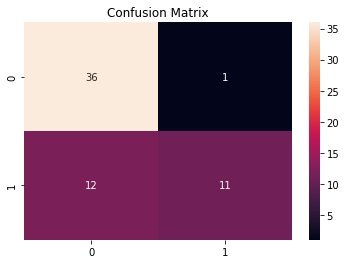

In [35]:
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True)
plt.title("Confusion Matrix")
plt.show()

In [36]:
print("Classification Report")
print(classification_report(y_test, y_pred_lr))

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.97      0.85        37
           1       0.92      0.48      0.63        23

    accuracy                           0.78        60
   macro avg       0.83      0.73      0.74        60
weighted avg       0.81      0.78      0.76        60



In [37]:
print("AUC Score: {}".format(roc_auc_score(y_test, y_pred_proba_lr)))

AUC Score: 0.8601645123384254


In [38]:
from sklearn.model_selection import cross_val_score
lr_acc = np.mean(cross_val_score(lr, X, y, cv=10, scoring='accuracy')) 
print("Cross Validation accuracy: {}".format(lr_acc))

Cross Validation accuracy: 0.7956321839080459


# Support Vector Classifier

In [39]:
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(X_train, y_train)

SVC(probability=True)

In [40]:
print("Train accuracy :{}".format(accuracy_score(y_train, svc.predict(X_train))))
print("Test accuracy :{}".format(accuracy_score(y_test, svc.predict(X_test))))

Train accuracy :0.9037656903765691
Test accuracy :0.8


In [41]:
y_pred_svc = svc.predict(X_test)

In [42]:
y_pred_proba_svc = svc.predict_proba(X_test)[:, 1]

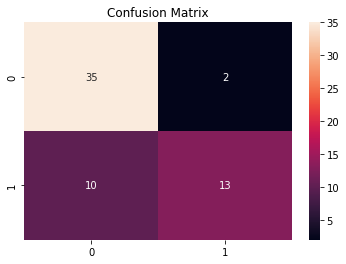

In [43]:
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True)
plt.title("Confusion Matrix")
plt.show()

In [44]:
print("Classification Report")
print(classification_report(y_test, y_pred_svc))

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.95      0.85        37
           1       0.87      0.57      0.68        23

    accuracy                           0.80        60
   macro avg       0.82      0.76      0.77        60
weighted avg       0.81      0.80      0.79        60



In [45]:
print("AUC Score: {}".format(roc_auc_score(y_test, y_pred_proba_svc)))

AUC Score: 0.8836662749706228


In [46]:
from sklearn.model_selection import cross_val_score
svc_acc = np.mean(cross_val_score(svc, X, y, cv=10, scoring='accuracy')) 
print("Cross Validation accuracy: {}".format(svc_acc))

Cross Validation accuracy: 0.6789655172413793


# Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
print("Train accuracy :{}".format(accuracy_score(y_train, dt.predict(X_train))))
print("Test accuracy :{}".format(accuracy_score(y_test, dt.predict(X_test))))

Train accuracy :1.0
Test accuracy :0.8


In [49]:
y_pred_dt = dt.predict(X_test)

In [50]:
y_pred_proba_dt = dt.predict_proba(X_test)[:, 1]

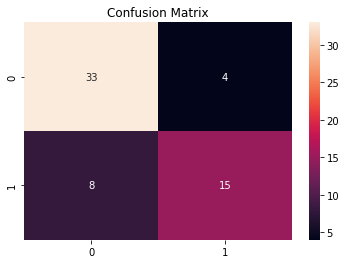

In [51]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True)
plt.title("Confusion Matrix")
plt.show()

In [52]:
print("Classification Report")
print(classification_report(y_test, y_pred_dt))

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.89      0.85        37
           1       0.79      0.65      0.71        23

    accuracy                           0.80        60
   macro avg       0.80      0.77      0.78        60
weighted avg       0.80      0.80      0.80        60



In [53]:
print("AUC Score: {}".format(roc_auc_score(y_test, y_pred_proba_dt)))

AUC Score: 0.7720329024676851


In [54]:
from sklearn.model_selection import cross_val_score
dt_acc = np.mean(cross_val_score(dt, X, y, cv=10, scoring='accuracy')) 
print("Cross Validation accuracy: {}".format(dt_acc))

Cross Validation accuracy: 0.6854022988505747


# Plotting ROC Curve for all 3 models to compare their accuracies 

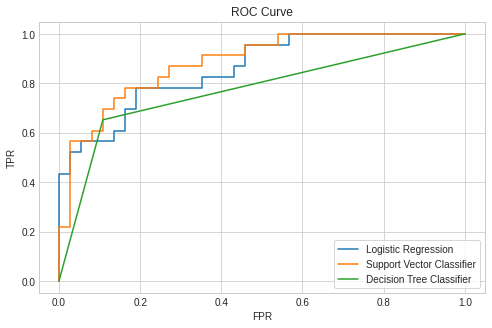

In [55]:
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test, y_pred_proba_lr)
fpr_svc, tpr_svc, threshold_svc = roc_curve(y_test, y_pred_proba_svc)
fpr_dt, tpr_dt, threshold_dt = roc_curve(y_test, y_pred_proba_dt)

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8, 5))
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_svc, tpr_svc, label="Support Vector Classifier")
plt.plot(fpr_dt, tpr_dt, label="Decision Tree Classifier")

plt.legend(loc='lower right', frameon=True)
plt.title("ROC Curve")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.show()

# Tuning the Hyperparameter 'C' for Logistic Regression

In [56]:
from sklearn.model_selection import GridSearchCV

params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid = GridSearchCV(estimator=lr, param_grid=params, cv=10, scoring='accuracy', n_jobs=-1)
grid.fit(X,y)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='accuracy')

In [57]:
grid.best_params_

{'C': 0.001}

In [58]:
grid.best_score_

0.8089655172413794

# Tuning the Hyperparameters 'C', 'kernel' & 'degree' for Support Vector Classifier

In [59]:
from sklearn.model_selection import RandomizedSearchCV

params = { 'C': [1, 10, 100, 1000],
           'kernel': ['poly'],
           'degree': [2, 3, 4],
         }

random = RandomizedSearchCV(svc, param_distributions=params, cv=10, scoring='accuracy', n_jobs=-1)
random.fit(X,y)

RandomizedSearchCV(cv=10, estimator=SVC(probability=True), n_jobs=-1,
                   param_distributions={'C': [1, 10, 100, 1000],
                                        'degree': [2, 3, 4],
                                        'kernel': ['poly']},
                   scoring='accuracy')

In [60]:
random.best_params_

{'C': 1000, 'degree': 2, 'kernel': 'poly'}

In [61]:
random.best_score_

0.6789655172413793

# Tuning the Hyperparameters for Decision Tree

In [62]:
from sklearn.model_selection import GridSearchCV

params = { 'max_depth': [3, 4, 5],
           'min_samples_split': [2, 3],
           'min_samples_leaf': [1, 2, 3]}

grid = GridSearchCV(estimator=dt, param_grid=params, cv=10, scoring='accuracy', n_jobs=-1)
grid.fit(X,y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3]},
             scoring='accuracy')

In [63]:
grid.best_params_

{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [64]:
grid.best_score_

0.735632183908046

# Save the best Model

In [65]:
import pickle
pickle.dump(lr, open('model.pkl', 'wb'))
model = pickle.load(open('model.pkl', 'rb'))
print(model)

LogisticRegression()


In [66]:
# predict the output
y_pred_lr = lr.predict(X_test)

# confusion matrix
print('Confusion matrix of Logistic Regression model: \n', confusion_matrix(y_test, y_pred_lr),'\n')

# show the accuracy
print('Accuracy of Logistic Regression  model = ', format(lr_acc))

Confusion matrix of Logistic Regression model: 
 [[36  1]
 [12 11]] 

Accuracy of Logistic Regression  model =  0.7956321839080459


# Thank you